In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)


In [19]:
df = pd.read_csv('./summ_feed_joined.csv')
df

,DESYNPUF_ID,OPIOID_HARMED,BENE_SEX_IDENT_CD,BENE_AGE,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,ICD_28521,ICD_58881,ICD_5990,ICD_2809,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651,TOTAL_PAY_AMT
0,3951A55F8A5682D3,1,1,-2.181851,1,0,0.192998,0.228105,-0.571213,0.618058,1,0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.326609
1,39898ACF8B8DF7BB,1,2,1.936068,1,0,0.192998,0.228105,-0.571213,0.618058,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.331567
2,7C7CF7C730043552,1,2,-3.114210,1,0,-4.276697,-3.611656,-0.571213,-1.115938,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324485
3,800C1A2D55B31C97,1,2,-0.161740,3,0,0.192998,0.228105,-0.571213,0.618058,1,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.331567
4,804A02EA8F3AEF6B,1,1,-1.948761,1,0,0.192998,0.228105,-0.571213,0.618058,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,E5753493DCDF3532,0,2,-2.958817,2,0,0.192998,0.228105,1.820186,0.618058,1,1,1,0,0,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289784
804,ED1CC041280181ED,0,1,0.770619,1,0,0.192998,0.228105,-0.571213,-1.693937,1,1,0,0,1,1,1,1,0,1,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.258772
805,EF0E074B9F7625A4,0,1,-0.550223,1,0,0.192998,0.228105,-0.571213,-1.693937,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.336524
806,F3B93FD9C345F93A,0,2,-1.560278,1,0,-5.766595,-4.891576,-0.571213,-1.693937,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305364


In [20]:
# RF FEAT. IMPORTANCE LOWEST PERFORMERS: 
# 28521
# 2809
# bene_smi_cverage_tot_mons
# ben_hi_coverage_tot_mons
# 58881
# Skretia
# Esrd 
# AGE
# DEPRESSN
# CNCR
numerical_columns = [
#  'BENE_AGE',
#  'BENE_HI_CVRAGE_TOT_MONS',
#  'BENE_SMI_CVRAGE_TOT_MONS',
 'BENE_HMO_CVRAGE_TOT_MONS',
 'PLAN_CVRG_MOS_NUM',
 'TOTAL_PAY_AMT']
categorical_columns = ['BENE_SEX_IDENT_CD',
 'BENE_RACE_CD',
#  'BENE_ESRD_IND',
 'SP_ALZHDMTA',
 'SP_CHF',
 'SP_CHRNKIDN',
#  'SP_CNCR',
 'SP_COPD',
#  'SP_DEPRESSN',
 'SP_DIABETES',
 'SP_ISCHMCHT',
 'SP_OSTEOPRS',
 'SP_RA_OA',
#  'SP_STRKETIA',
#  'ICD_28521',
#  'ICD_58881',
 'ICD_5990',
#  'ICD_2809',
 'ICD_3051',
 'ICD_311',
 'ICD_5859',
 'ICD_5849',
 'ICD_5856',
 'ICD_27651']

In [21]:
# f_cols = list(df.columns)
# f_cols.remove('OPIOID_HARMED')
# f_cols.remove('DESYNPUF_ID')
f_cols = numerical_columns + categorical_columns
X = df[f_cols]
y = df['OPIOID_HARMED']

In [22]:
from collections import Counter
Counter(df.BENE_ESRD_IND)

Counter({0: 689, 1: 119})

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [24]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1
)
numerical_pipe = SimpleImputer(strategy="mean")

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(max_depth= 6, max_features= 8, min_samples_leaf= 6, n_estimators= 120)),
    ]
)
dtree = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", DecisionTreeClassifier(max_depth= 6, max_features= 8, min_samples_leaf= 6)),
    ]
)
gbm = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", GradientBoostingClassifier(learning_rate = 0.01, max_depth= 4, n_estimators=200, subsample = 0.5)),
        # 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5
    ]
)

gbm.fit(X_train,y_train)
rf.fit(X_train, y_train)
dtree.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BENE_SEX_IDENT_CD',
                                                   'BENE_RACE_CD',
                                                   'SP_ALZHDMTA', 'SP_CHF',
                                                   'SP_CHRNKIDN', 'SP_COPD',
                                                   'SP_DIABETES', 'SP_ISCHMCHT',
                                                   'SP_OSTEOPRS', 'SP_RA_OA',
                                                   'ICD_5990', 'ICD_3051',
                                                   'ICD_311', 'ICD_5859',
                                                   'ICD_5849', 'ICD_5856',
                                                   'ICD_27651']),
                                                 ('num', SimpleImputer(),
                                                  ['BENE_HMO_CVRAGE_TOT_MONS',
                                                   'PLAN_CVRG_MOS_NUM',
                                                   'TOTAL_PAY_AMT'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=6, max_features=8,
                                        min_samples_leaf=6))])

In [25]:
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")
for x in [rf,dtree,gbm]:
    print(x['classifier'], '\ntrain accuracy:', x.score(X_train,y_train))
    print('test accuracy:', x.score(X_test,y_test))

RF train accuracy: 0.784
RF test accuracy: 0.787
RandomForestClassifier(max_depth=6, max_features=8, min_samples_leaf=6,
                       n_estimators=120) 
train accuracy: 0.7838283828382838
test accuracy: 0.7871287128712872
DecisionTreeClassifier(max_depth=6, max_features=8, min_samples_leaf=6) 
train accuracy: 0.7508250825082509
test accuracy: 0.7475247524752475
GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=200,
                           subsample=0.5) 
train accuracy: 0.8052805280528053
test accuracy: 0.7920792079207921


In [26]:
def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)
def full_log_likelihood(w, X, y):
    score = np.dot(X, w).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def null_log_likelihood(w, X, y):
    z = np.array([w if i == 0 else 0.0 for i, w in enumerate(w.reshape(1, X.shape[1])[0])]).reshape(X.shape[1], 1)
    score = np.dot(X, z).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def mcfadden_rsquare(w, X, y):
    return 1.0 - (full_log_likelihood(w, X, y) / null_log_likelihood(w, X, y))

def mcfadden_adjusted_rsquare(w, X, y):
    k = float(X.shape[1])
    return 1.0 - ((full_log_likelihood(w, X, y) - k) / null_log_likelihood(w, X, y))

0.14169960474308296
area under the curve: 0.8448616600790515
receiving operating characteristic auc score: 0.7787549407114626
r2 score: 0.14169960474308296
general accuracy: 0.7871287128712872
confusion matrix:
 [[96 14]
 [29 63]]
precision: 0.8181818181818182 recall: 0.6847826086956522 f1(harmonic mean): 0.7455621301775148


Text(0.5, 1.0, 'ROC curve:\n')

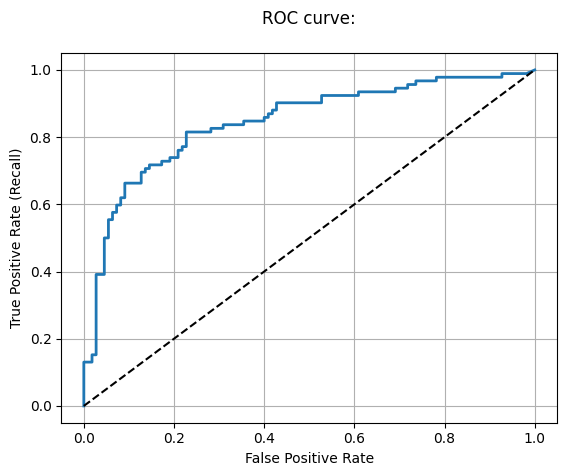

In [27]:
# from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score, brier_score_loss, \
    log_loss, roc_auc_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, median_absolute_error, r2_score
def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr,tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
y_pred = rf.predict(X_test)
rocauc_temp = roc_auc_score(y_test, y_pred)
r2_temp = r2_score(y_test, y_pred)
print(efron_rsquare(y_test, y_pred))
# score_temp = rf.score(X_test, y_pred)   
score_temp = accuracy_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
auc_temp = auc(false_positive_rate, true_positive_rate)
# rf.score()
print('area under the curve:',auc_temp)
print('receiving operating characteristic auc score:',rocauc_temp)
print('r2 score:',r2_temp)
print('general accuracy:', score_temp)

cmatrix_temp = confusion_matrix(y_test, y_pred=y_pred)
print('confusion matrix:\n', cmatrix_temp)
prec_temp = precision_score(y_test, y_pred)
recall_temp = recall_score(y_test, y_pred)
f1_temp = f1_score(y_test, y_pred)
print('precision:',prec_temp, 'recall:',recall_temp, 'f1(harmonic mean):',f1_temp)

plot_roc_curve(false_positive_rate, true_positive_rate, label = str(rf) + ', C-statistics= '+ str(auc_temp))
plt.title('ROC curve:\n')

In [28]:
import pandas as pd


In [29]:
rf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BENE_SEX_IDENT_CD',
                                                   'BENE_RACE_CD',
                                                   'SP_ALZHDMTA', 'SP_CHF',
                                                   'SP_CHRNKIDN', 'SP_COPD',
                                                   'SP_DIABETES', 'SP_ISCHMCHT',
                                                   'SP_OSTEOPRS', 'SP_RA_OA',
                                                   'ICD_5990', 'ICD_3051',
                                                   'ICD_311', 'ICD_5859',
                                                   'ICD_5849', 'ICD_5856',
                                                   'ICD_27651']),
                                                 ('num', SimpleImputer(),
                                                  ['BENE_HMO_CVRAGE_TOT_MONS',
                                                   'PLAN_CVRG_MOS_NUM',
                                                   'TOTAL_PAY_AMT'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 RandomForestClassifier(max_depth=6, max_features=8,
                                        min_samples_leaf=6,
                                        n_estimators=120))])

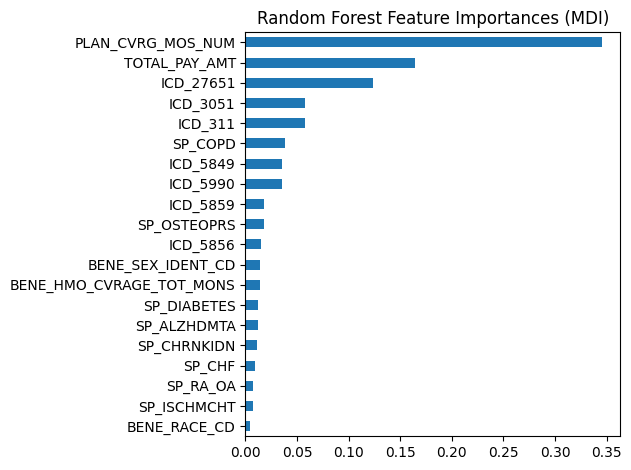

In [30]:
def plot_mdi(clf):
    feature_names = clf[:-1].get_feature_names_out()

    mdi_importances = pd.Series(
        clf[-1].feature_importances_, index=feature_names
    ).sort_values(ascending=True)

    ax = mdi_importances.plot.barh()
    ax.set_title("Random Forest Feature Importances (MDI)")
    ax.figure.tight_layout()

plot_mdi(rf)

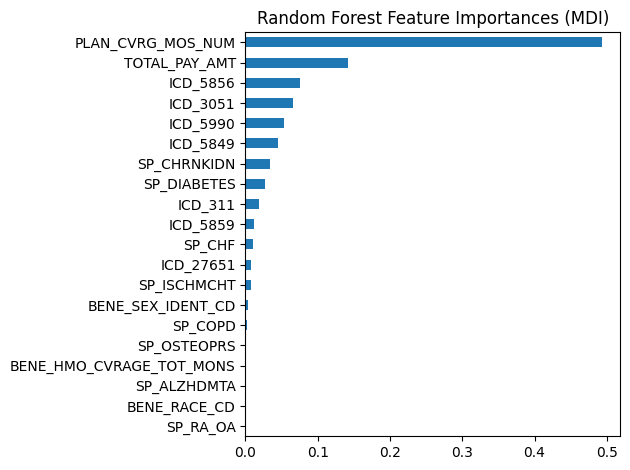

In [31]:
plot_mdi(dtree)

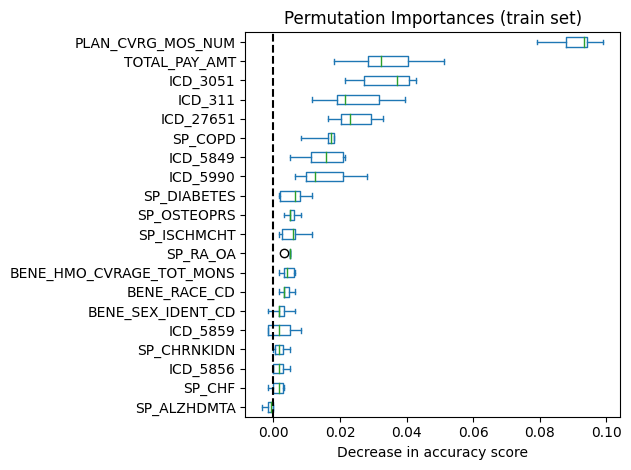

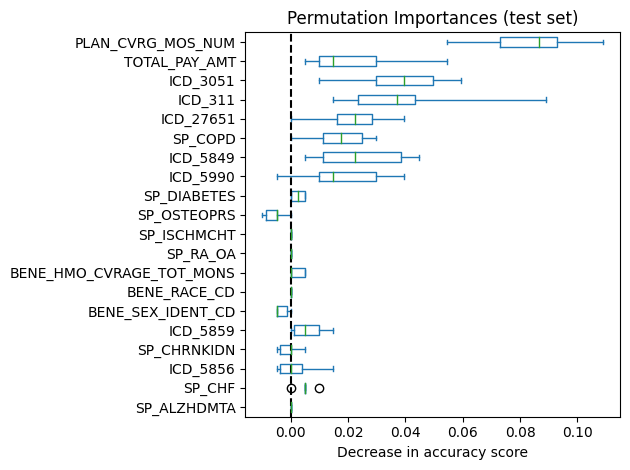

In [32]:
from sklearn.inspection import permutation_importance
def plot_perm(clf):
    train_result = permutation_importance(
        clf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
    )
    test_results = permutation_importance(
        clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
    )
    sorted_importances_idx = train_result.importances_mean.argsort()
    train_importances = pd.DataFrame(
        train_result.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    test_importances = pd.DataFrame(
        test_results.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    for name, importances in zip(["train", "test"], [train_importances, test_importances]):
        ax = importances.plot.box(vert=False, whis=10)
        ax.set_title(f"Permutation Importances ({name} set)")
        ax.set_xlabel("Decrease in accuracy score")
        ax.axvline(x=0, color="k", linestyle="--")
        ax.figure.tight_layout()
plot_perm(rf)

In [33]:
pd.read_csv('icd9_incidence_differential.csv')

,ICD_CODE,ICD_DESC,HARM_SAMPLE_PCT,RAND_SAMPLE_PCT,RELATIVE_DIFF
0,28521,Anemia in chronic kidney disease,0.009749,0.005639,0.728856
1,496,Chronic obstructive pulmonary disease,0.009184,0.007016,0.308994
2,E9352,NaN,0.008336,0.000066,126.133566
3,58881,Secondary hyperparathyroidism of renal origin,0.007865,0.004000,0.966408
4,5990,Urinary tract infection,0.007441,0.004655,0.598401
5,2809,Iron deficiency anemia,0.007253,0.004196,0.728334
6,41401,Atherosclerotic heart disease of native corona...,0.007206,0.005377,0.340184
7,3051,Nicotine dependence,0.006641,0.004000,0.660261
8,311,Major depressive disorder,0.006123,0.003672,0.667410
9,5859,Chronic kidney disease,0.004804,0.003147,0.526321


In [34]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [80,100,120]
max_features = [8,10, 12]
max_depth = [5,6,7]
min_samples_leaf = [4,5,6]
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features, max_depth = max_depth, min_samples_leaf=min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.747217 using {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 5, 'n_estimators': 100}
0.742670 (0.059329) with: {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 80}
0.745967 (0.053606) with: {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 100}
0.743097 (0.058169) with: {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 120}
0.742670 (0.051303) with: {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 5, 'n_estimators': 80}
0.746790 (0.057202) with: {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 5, 'n_estimators': 100}
0.739774 (0.055440) with: {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 5, 'n_estimators': 120}
0.741008 (0.051320) with: {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 6, 'n_estimators': 80}
0.739362 (0.057998) with: {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 6, 'n_estimators': 100}
0.746363 (0.051453) with: {'max_depth': 5, 'max_featur